In [1]:
import time
import numpy as np
from glob import glob
from tqdm import tqdm
import pandas as pd
from utils import get_hour_crawl_df_lst, get_daily_origin_df_dict
from concurrent.futures import ProcessPoolExecutor
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import clear_output
sns.set_palette("Set1", 7)
sns.color_palette("Set1", 7)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

In [2]:
sda_path = '/mnt/sda/tnecniv/tnecniv-2023/'
week_lst = sorted(glob(sda_path+'*-*'))
_week_31_32_csvs = sorted(glob(week_lst[31]+'/*-*.csv') + glob(week_lst[32]+'/*-*.csv'))    # 0218~0302
week_31_32_day_csvs = [_week_31_32_csvs[24*i:24*(i+1)] for i in range(14)]
week_31_32_origin  = sorted(glob(sda_path+'daily_origin/*.csv'))[73:88]
week_31_32_ori_dict = get_daily_origin_df_dict(week_31_32_origin)
date_lst = list(week_31_32_ori_dict.keys())

100%|██████████| 14/14 [00:07<00:00,  2.00it/s]


In [3]:
def get_ko_vc_sc(day_csv_lst):
    vc, sin03_vc, sc, sin03_sc = [], [], [], []
    date = day_csv_lst[0].split('/')[-1][:6]
    for csv in tqdm(day_csv_lst):
        df_lst = get_hour_crawl_df_lst(csv, week_31_32_ori_dict[date])
        for df in df_lst:
            ko_sub_df = df[df['language'] == 'ko']
            sc.append(ko_sub_df.shape[0])
            vc.append(ko_sub_df['viewer_count'].sum())
            ko_sin03_sub_df = ko_sub_df[ko_sub_df['origin'] == 'sin03']
            sin03_sc.append(ko_sin03_sub_df.shape[0])
            sin03_vc.append(ko_sin03_sub_df['viewer_count'].sum())
    return vc, sin03_vc, sc, sin03_sc

# ko_vc, ko_sin03_vc, ko_sc, ko_sin03_sc = [], [], [], []
# with ProcessPoolExecutor(max_workers=7) as executor:
#     for vc, sin03_vc, sc, sin03_sc in executor.map(get_ko_vc_sc, week_31_32_day_csvs):
#         ko_vc.extend(vc)
#         ko_sin03_vc.extend(sin03_vc)
#         ko_sc.extend(sc)
#         ko_sin03_sc.extend(sin03_sc)

# np.save('./result/twitch_korea/korean_total_viewer_count', np.array(ko_vc))
# np.save('./result/twitch_korea/korean_total_streamer_count', np.array(ko_sc))
# np.save('./result/twitch_korea/korean_sin03_viewer_count', np.array(ko_sin03_vc))
# np.save('./result/twitch_korea/korean_sin03_streamer_count', np.array(ko_sin03_sc))

In [4]:
ko_vc = np.load('./result/twitch_korea/korean_total_viewer_count.npy')
ko_sc = np.load('./result/twitch_korea/korean_total_streamer_count.npy')
ko_sin03_vc = np.load('./result/twitch_korea/korean_sin03_viewer_count.npy')
ko_sin03_sc = np.load('./result/twitch_korea/korean_sin03_streamer_count.npy')

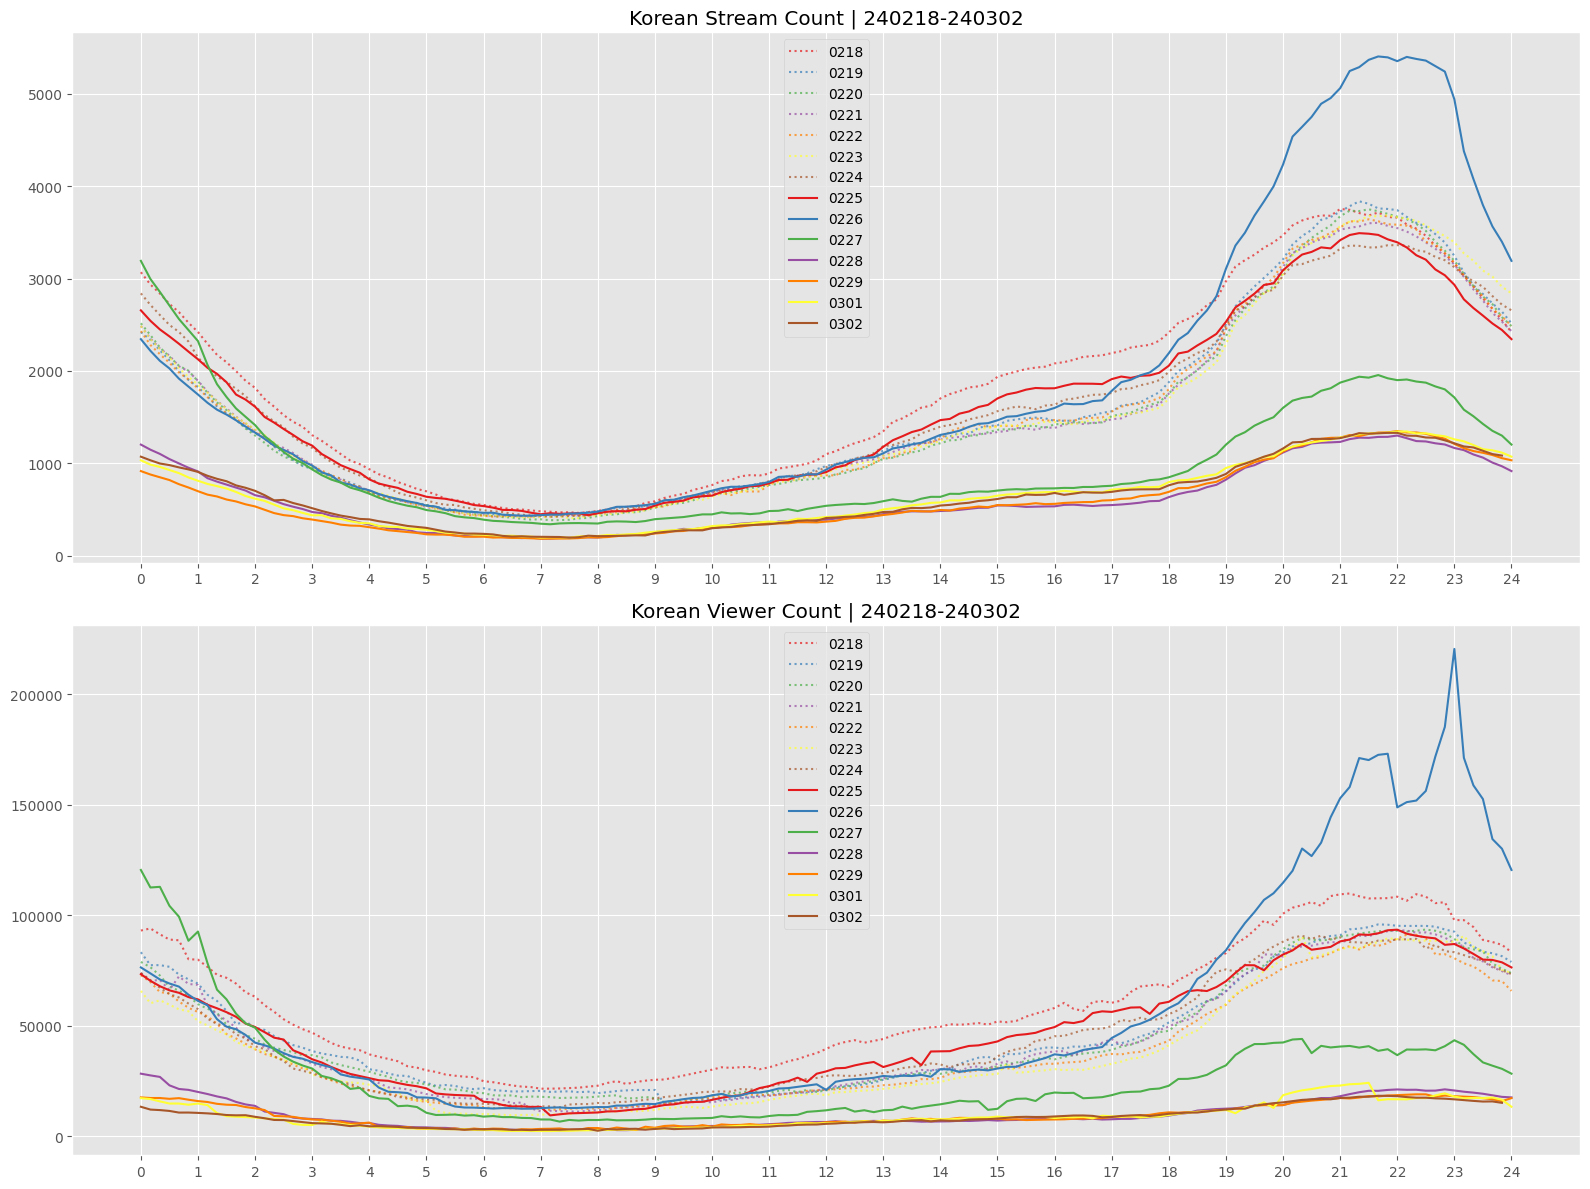

In [18]:
n = 2
fig, ax = plt.subplots(n, figsize=(16, 6*n))
for j in range(14):
    ax[0].plot(ko_sin03_sc[144*j:144*(j+1)+1], label = date_lst[j][2:], 
               linestyle = 'solid' if j >= 7 else 'dotted', 
               alpha= 1 if j >= 7 else .7)
    ax[1].plot(ko_sin03_vc[144*j:144*(j+1)+1], label = date_lst[j][2:], 
               linestyle = 'solid' if j >= 7 else 'dotted', 
               alpha= 1 if j >= 7 else .7)
for i in range(2):
    ax[i].legend(loc='upper center')
    ax[i].set_xticks(np.arange(0, 145, 6), np.arange(25))
ax[0].set_title('Korean Stream Count | 240218-240302')
ax[1].set_title('Korean Viewer Count | 240218-240302')

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


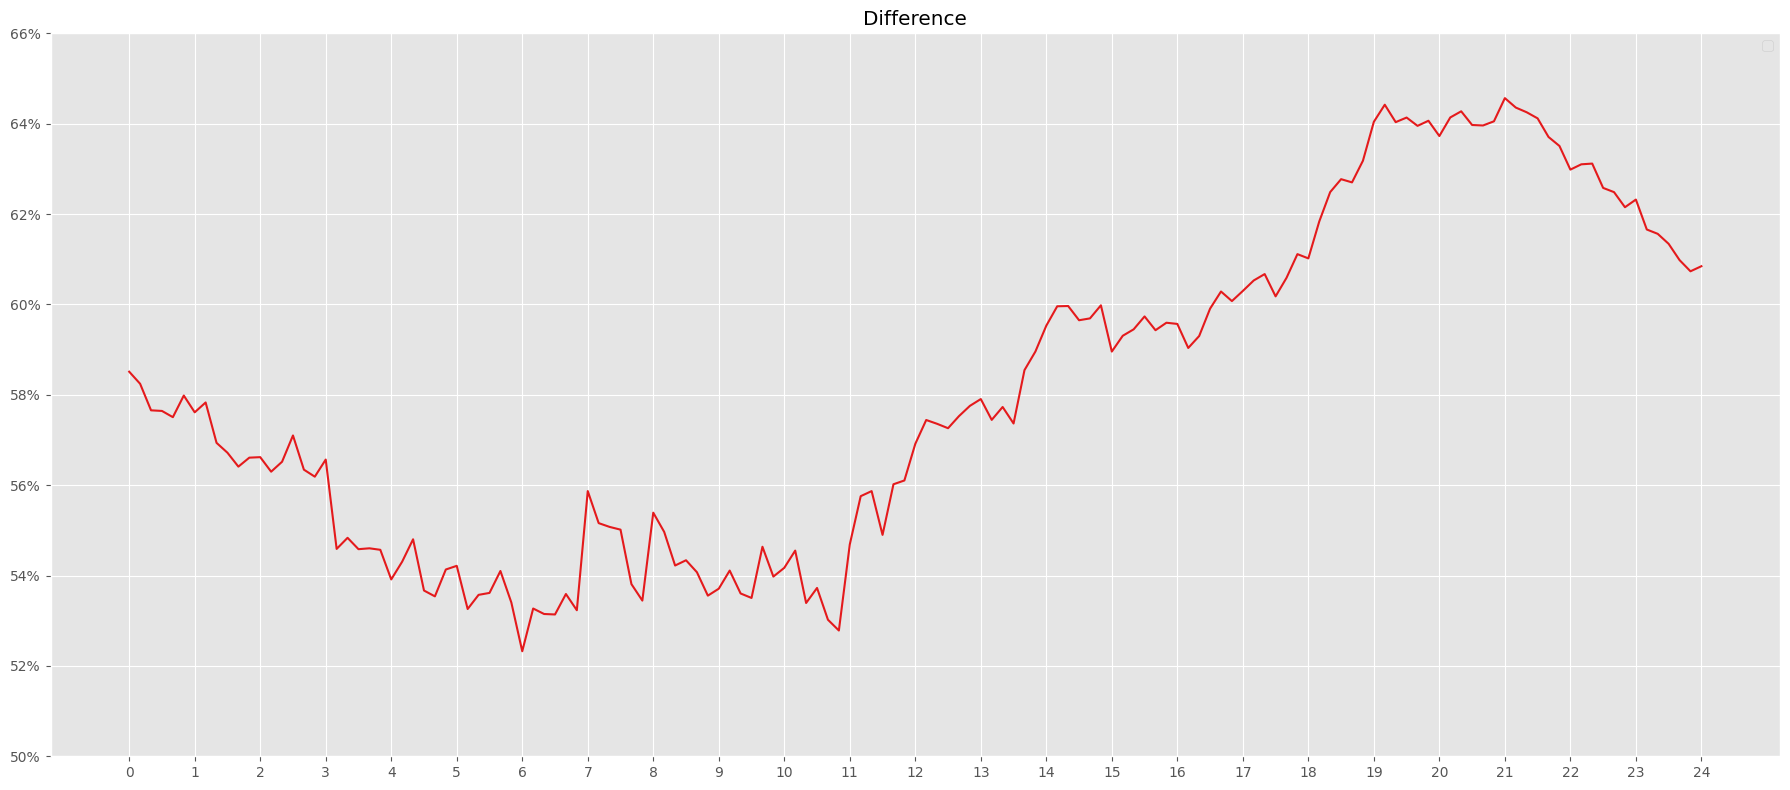

In [6]:
n = 1
fig, ax = plt.subplots(n, figsize=(18, 8*n))
before_exit = np.average(np.array([ko_sin03_sc[144*i:144*(i+1)+1] for i in range(1, 7)]), axis=0)
after_exit = np.average(np.array([ko_sin03_sc[144*i:144*(i+1)+1] for i in range(10, 13)]), axis=0)

ax.plot(np.arange(145), 1 - after_exit / before_exit)
ax.set_xticks(np.arange(0, 145, 6), np.arange(25))
ax.set_title('Difference')
ax.set_yticks(ax.get_yticks(), [str(y)+'%' for y in np.rint(ax.get_yticks()*100).astype(int)])
ax.legend()
fig.tight_layout()

In [15]:
# def get_ko_vc_sc(day_csv_lst):
#     res = []
#     date = day_csv_lst[0].split('/')[-1][:6]
#     for csv in tqdm(day_csv_lst):
#         df_lst = get_hour_crawl_df_lst(csv, week_31_32_ori_dict[date])
#         for df in df_lst:
#             res.append(df[(df['language'] == 'ko') & (df['content_classification_labels'] != '')].shape[0])
#     return res
# ccl_ct = []
# with ProcessPoolExecutor(max_workers=5) as executor:
#     for res in executor.map(get_ko_vc_sc, week_31_32_day_csvs):
#         ccl_ct.extend(res)
# np.save('./result/twitch_korea/ccl_ct.npy', np.array(ccl_ct))

Text(0.5, 1.0, '# of Streams with Content Classification Label(s) Applied | 240218-240302')

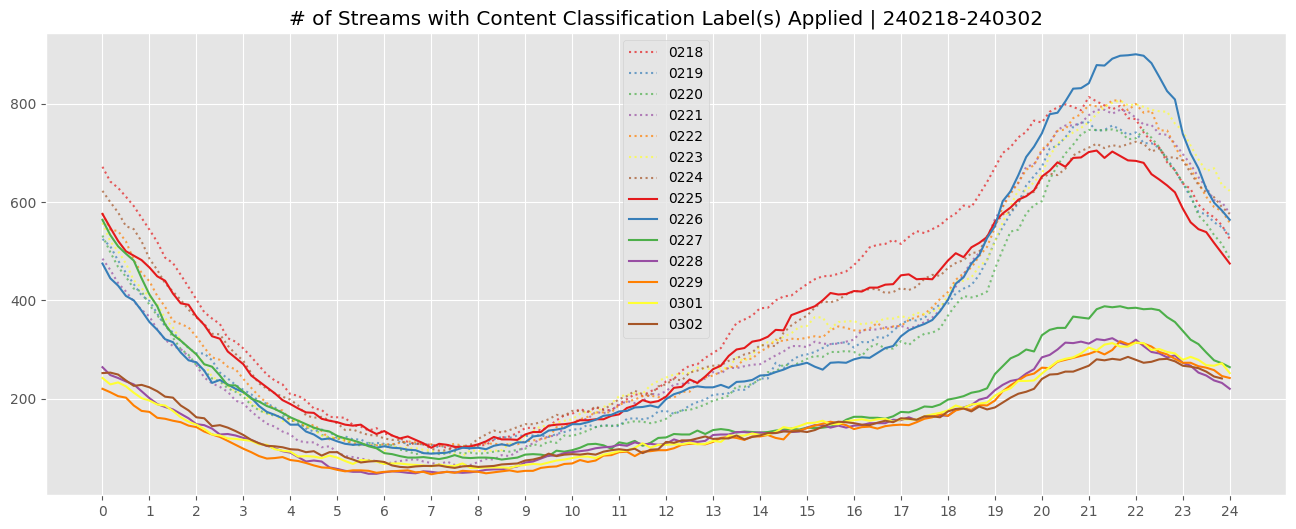

In [20]:
ccl_ct = np.load('./result/twitch_korea/ccl_ct.npy')
n = 1
fig, ax = plt.subplots(n, figsize=(16, 6*n))
for j in range(14):
    ax.plot(ccl_ct[144*j:144*(j+1)+1], label = date_lst[j][2:], 
               linestyle = 'solid' if j >= 7 else 'dotted', 
               alpha= 1 if j >= 7 else .7)
ax.legend(loc='upper center')
ax.set_xticks(np.arange(0, 145, 6), np.arange(25))
ax.set_title('# of Streams with Content Classification Label(s) Applied | 240218-240302')